Importación de librerias a utilizar

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

Se importa el arhico csv y se guarda en la varible "depositos"

In [90]:
depositos = pd.read_csv("depositos_oinks.csv")

Observamos el data set, con cada uno de sus columnas (features)

In [91]:
depositos.head()

,Unnamed: 0,user_id,operation_value,operation_date,maplocation_name,user_createddate
0,0,0e52d550-ae23-407a-9b1f-6e5fb1f066ab,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689
1,1,975ed41e-d891-4c23-aeba-06363019d8e3,900.0,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075
2,2,f9043545-dfc2-402f-a8c7-0a61f21cb719,1800.0,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941
3,3,979ca8ad-9600-4a1f-81e9-e70c2f55cdc5,6500.0,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291
4,4,171db06e-2e4b-4542-a9c9-32028520fda4,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994


In [92]:
depositos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4345 non-null   int64  
 1   user_id           4345 non-null   object 
 2   operation_value   4345 non-null   float64
 3   operation_date    4345 non-null   object 
 4   maplocation_name  4345 non-null   object 
 5   user_createddate  4345 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 203.8+ KB


Se renombra la columna "Unnamed: 0" como "usurioId" la cual va a contener el Id de cada usuario y se elimina la columna "user_id" pues se reemplaza por la nueva columna generada, teniendo en cuenta que la columna "user_id" era muy confusa y larga.

In [93]:
depositos.rename(columns={"Unnamed: 0" : "usuarioId"}, inplace=True)
depositos.drop(columns=['user_id'], inplace = True)

Se define que el usuarioId empiece desde 1000

In [94]:
depositos["usuarioId"] = depositos["usuarioId"] + 1000

In [95]:
depositos.head()

,usuarioId,operation_value,operation_date,maplocation_name,user_createddate
0,1000,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689
1,1001,900.0,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075
2,1002,1800.0,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941
3,1003,6500.0,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291
4,1004,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994


Se puede observar que el archivo csv no presenta ningun valor faltante o nulo.

In [96]:
depositos.isnull().sum()

usuarioId           0
operation_value     0
operation_date      0
maplocation_name    0
user_createddate    0
dtype: int64

Se observa el tamaño del csv, 4345 filas y 6 columnas

In [97]:
depositos.shape

(4345, 5)

Se observa que el csv no tiene valores duplicados

In [98]:
depositos.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4340    False
4341    False
4342    False
4343    False
4344    False
Length: 4345, dtype: bool

Se define la columna "operation_value", como la columna de interes. Entendiendose que es la columna que contiene el valor de cada operación realizada por el usuario, lo que nos demuestra la fidelidad o confianza del usuario para la empresa, al depositar mas o menos cantidad.

Se cambia el tipo de dato de la columna "operation_value" a entero para poder trabajar mejor

In [99]:
depositos["operation_value"] = depositos["operation_value"].astype(int)

Al cambiar el tipo de dato a entero la columna operation_value, se elimina un cero al final de cada cifra, por lo que es necesario volver a poner este numero en la cifra.

Se crea una columna de ceros para poder unir la columna de operation_value y la del cero faltante. Posterior a esto cambiamos el tipo de dato de cada columna para poder realizar la concatenacion, en donde se crea la columna "valor_deposito". Finalmente se cambia el tipo de dato de la columna resultante a numerica para poder trabajar con ella, y se elimina la columna de ceros y la de operation value

In [100]:
depositos["ceros"] = 0
depositos["operation_value"] = depositos["operation_value"].astype(str)
depositos["ceros"] = depositos["ceros"].astype(str)
depositos["valor_operacion"] = depositos.operation_value.str.cat(depositos.ceros)


In [101]:
depositos.drop(columns=['operation_value'], inplace = True)
depositos.drop(columns=['ceros'], inplace = True)


In [102]:
depositos["valor_operacion"] = depositos.valor_operacion.astype(int)

In [103]:
depositos.head()

,usuarioId,operation_date,maplocation_name,user_createddate,valor_operacion
0,1000,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689,2738500
1,1001,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075,9000
2,1002,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941,18000
3,1003,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291,65000
4,1004,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994,1500000


Se observan los valos estadisticos de la columna de interes. Mediana, minimo, desviacion estandar, etc.

In [104]:
depositos["valor_operacion"].describe()

count    4.345000e+03
mean     3.461835e+05
std      1.071427e+06
min      5.000000e+02
25%      1.650000e+04
50%      5.600000e+04
75%      2.230000e+05
max      2.595000e+07
Name: valor_operacion, dtype: float64

Promedio de la columna "operation_value"

Se observa que la cantidad promedio depositada por el usuario es de 346.183

In [105]:
depositos["valor_operacion"].mean()

346183.5443037975

Según los cuartiles observamos:

El Q1 (cuartil 1) que representa el 25% de los depositos realidos por los usuarios, nos permite observar que los usuarios han depositado hasta 165.000. El Q2 (cuartil 2) nos dice que el 50% de los usuarios ha depositado hasta 560.000 y el Q3(cuartil 3) nos dice que el 75% de los usuarios ha depositado hasta 2.230.000. 

Por lo que apartir de estas cantidades, podemos realizar una clasificacion de la confianza depositada por el usuario en la plataforma.

Podríamos realizar la sigueinte clasificación:

de 0 - 165.000  confianza ---> aceptable
de 166.000 - 560.000 confianza ---> buena
de 561.000 - 2.230.000 confianza --> muy buena
de 2.231.000 - 25.950.000 ---> excelente

In [106]:
print(depositos.valor_operacion.quantile([.25, .5, .75]))

0.25     16500.0
0.50     56000.0
0.75    223000.0
Name: valor_operacion, dtype: float64


Se observa que el valor maximo depositado es 25.950.000, junto con el id de la persona, el lugar donde lo hizo, etc.

In [107]:
depositos.loc[depositos.valor_operacion.idxmax()]

usuarioId                                                 3666
operation_date                             2022-02-05 19:59:48
maplocation_name    CC Plaza de las Américas  - Plaza Mariposa
user_createddate                    2021-12-23 18:20:05.241501
valor_operacion                                       25950000
Name: 2666, dtype: object

Se observa que el valor minimo depositado es 500, junto con el id de la persona, el lugar donde lo hizo, etc.

In [108]:
depositos.loc[depositos.valor_operacion.idxmin()]

usuarioId                                            1024
operation_date                        2022-01-29 18:32:36
maplocation_name    CC Los Molinos - Zona Montaña Nivel 2
user_createddate               2021-09-27 12:24:40.651370
valor_operacion                                       500
Name: 24, dtype: object

Se observa un outlier o valor extremo en la columna "valor_operacion"

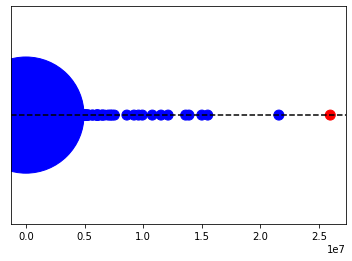

In [109]:
dep = depositos["valor_operacion"].to_numpy()
dep_unique, counts = np.unique(dep, return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(dep_unique)
colors[-1] = 'red'

 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(dep_unique, np.ones(len(dep_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

Según el histograma podemos ver que los datos se encuentran apilados o agrupados en un unico rango  [0-0.5], por lo que no existe casi dispersion entre ellos.

<AxesSubplot: ylabel='Frequency'>

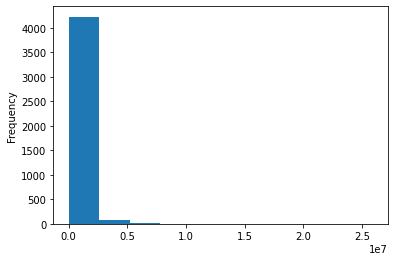

In [110]:
depositos["valor_operacion"].plot.hist()

Como se menciono anteriormente se realizara, la clasificación de los usuarios de la siguiente manera:

0 - 165.000  confianza ---> aceptable
166.000 - 560.000 confianza ---> buena
561.000 - 2.230.000 confianza --> muy buena
2.231.000 - 25.950.000 ---> excelente


In [111]:
conditions = [(depositos["valor_operacion"]<= 165000), 
               (depositos["valor_operacion"]>= 166000) & (depositos["valor_operacion"]<= 560000),
               (depositos["valor_operacion"]>= 561000) & (depositos["valor_operacion"]<= 2230000),
               (depositos["valor_operacion"]>= 2231000) ]
values = ["aceptable", "buena","muy_buena", "excelente"]
depositos["category_cliente"] = np.select(conditions, values)

In [112]:
depositos

,usuarioId,operation_date,maplocation_name,user_createddate,valor_operacion,category_cliente
0,1000,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689,2738500,excelente
1,1001,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075,9000,aceptable
2,1002,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941,18000,aceptable
3,1003,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291,65000,aceptable
4,1004,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994,1500000,muy_buena
...,...,...,...,...,...,...
4340,5340,2021-12-26 13:29:06,CC Los Molinos - Zona Montaña Nivel 2,2021-02-26 09:04:03.443362,8500,aceptable
4341,5341,2022-01-23 14:32:37,CC Los Molinos - Zona Montaña Nivel 2,2022-01-23 14:31:03.394729,18000,aceptable
4342,5342,2021-12-06 19:33:24,CC Plaza de las Américas - Plaza Mariposa,2021-05-14 15:08:33.500127,35000,aceptable
4343,5343,2022-01-24 11:03:38,CC Los Molinos - Zona Montaña Nivel 2,2021-12-19 16:03:35.472917,1262000,muy_buena


Observamos como quedan clasificados los usuarios y la cantidades correspondientes a cada clasificacion.

In [113]:
depositos["category_cliente"].value_counts()

aceptable    3056
buena         697
muy_buena     449
excelente     143
Name: category_cliente, dtype: int64

<AxesSubplot: >

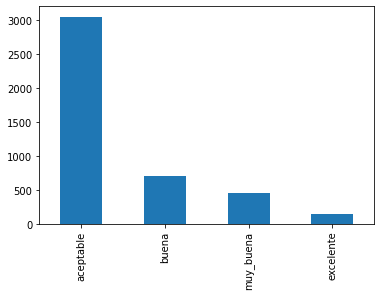

In [114]:
depositos["category_cliente"].value_counts().plot(kind="bar")

Se separan las columnas de operacion_date y se crean 2 columnas. Una con la fecha asociada a la operacion realizada y otra con la hora en la que se realizo esta operación.

Se elimina la columna operation_date.

In [115]:
name=depositos["operation_date"].str.split(expand=True)
name.columns=["fecha_operacion", "hora_operacion"]
depositos=pd.concat([depositos, name], axis=1)

In [116]:
depositos.drop(columns=['operation_date'], inplace = True)

Se separan la columna de user_createddate y se crean 2 columnas. Una con la fecha asociada a la creacion del usuario y otra con la hora en la que se creo el usuario.

Se elimina la columna user_createddate.

In [117]:
name=depositos["user_createddate"].str.split(expand=True)
name.columns=["fecha_creacion_usuario", "hora_creacio_usuario"]
depositos=pd.concat([depositos, name], axis=1)

In [118]:
depositos.drop(columns=['user_createddate'], inplace = True)

In [119]:
depositos

,usuarioId,maplocation_name,valor_operacion,category_cliente,fecha_operacion,hora_operacion,fecha_creacion_usuario,hora_creacio_usuario
0,1000,CC Plaza de las Américas - Plaza Mariposa,2738500,excelente,2022-01-14,13:07:56,2022-01-09,19:23:18.332689
1,1001,CC Plaza de las Américas - Plaza Mariposa,9000,aceptable,2022-02-06,13:11:25,2022-01-10,15:19:29.419075
2,1002,Universidad de los Andes - ML Piso 5,18000,aceptable,2022-02-23,14:01:56,2021-08-25,12:44:48.524941
3,1003,CC Plaza de las Américas - Plaza Mariposa,65000,aceptable,2021-12-16,12:09:45,2021-07-17,17:11:16.766291
4,1004,CC Plaza de las Américas - Plaza Mariposa,1500000,muy_buena,2022-01-25,12:00:18,2022-01-11,15:59:27.651994
...,...,...,...,...,...,...,...,...
4340,5340,CC Los Molinos - Zona Montaña Nivel 2,8500,aceptable,2021-12-26,13:29:06,2021-02-26,09:04:03.443362
4341,5341,CC Los Molinos - Zona Montaña Nivel 2,18000,aceptable,2022-01-23,14:32:37,2022-01-23,14:31:03.394729
4342,5342,CC Plaza de las Américas - Plaza Mariposa,35000,aceptable,2021-12-06,19:33:24,2021-05-14,15:08:33.500127
4343,5343,CC Los Molinos - Zona Montaña Nivel 2,1262000,muy_buena,2022-01-24,11:03:38,2021-12-19,16:03:35.472917


Se combia el tipo de dato de las columnas que contienen alguna fecha, al formato de fecha (datatime)

In [120]:
depositos["fecha_operacion"] = pd.to_datetime(depositos["fecha_operacion"])
depositos["fecha_creacion_usuario"] = pd.to_datetime(depositos["fecha_creacion_usuario"])

Se restan las fechas de creacion del usuario con la fecha en donde el usuario realizo la operacion, con el objetivo de saber cuanto tiempo se demoro el usuario en realizar el deposito. La diferencia se guarda en una nueva columna llamada "diferencia fecha".

In [121]:
depositos["diferencia_fecha"] = depositos["fecha_operacion"] - depositos["fecha_creacion_usuario"]

In [122]:
depositos

,usuarioId,maplocation_name,valor_operacion,category_cliente,fecha_operacion,hora_operacion,fecha_creacion_usuario,hora_creacio_usuario,diferencia_fecha
0,1000,CC Plaza de las Américas - Plaza Mariposa,2738500,excelente,2022-01-14,13:07:56,2022-01-09,19:23:18.332689,5 days
1,1001,CC Plaza de las Américas - Plaza Mariposa,9000,aceptable,2022-02-06,13:11:25,2022-01-10,15:19:29.419075,27 days
2,1002,Universidad de los Andes - ML Piso 5,18000,aceptable,2022-02-23,14:01:56,2021-08-25,12:44:48.524941,182 days
3,1003,CC Plaza de las Américas - Plaza Mariposa,65000,aceptable,2021-12-16,12:09:45,2021-07-17,17:11:16.766291,152 days
4,1004,CC Plaza de las Américas - Plaza Mariposa,1500000,muy_buena,2022-01-25,12:00:18,2022-01-11,15:59:27.651994,14 days
...,...,...,...,...,...,...,...,...,...
4340,5340,CC Los Molinos - Zona Montaña Nivel 2,8500,aceptable,2021-12-26,13:29:06,2021-02-26,09:04:03.443362,303 days
4341,5341,CC Los Molinos - Zona Montaña Nivel 2,18000,aceptable,2022-01-23,14:32:37,2022-01-23,14:31:03.394729,0 days
4342,5342,CC Plaza de las Américas - Plaza Mariposa,35000,aceptable,2021-12-06,19:33:24,2021-05-14,15:08:33.500127,206 days
4343,5343,CC Los Molinos - Zona Montaña Nivel 2,1262000,muy_buena,2022-01-24,11:03:38,2021-12-19,16:03:35.472917,36 days


Observamos que el promedio de los dias en que el usuario creo su cuenta y realizo el deposito es de 147 días.

In [123]:
depositos["diferencia_fecha"].mean()

Timedelta('147 days 16:51:48.676639816')

Se observan los cuartiles al igual que en la columna de la cantidad depositada. Por lo que usaremos esta herramienta estadistica, que nos dice como se distribuyen los datos para realizar la clasificación. Teniendo en cuenta que a menor días mas rapido se realizo la clasificación.

de 0 a 7 días ---> Excelente
de 8 a 49 días --> muy bueno
de 50 a 241 días --> bueno
de 242 a 913 días --> aceptable

In [124]:
depositos["diferencia_fecha"].describe()

count                           4345
mean     147 days 16:51:48.676639816
std      206 days 16:52:03.428705850
min                  0 days 00:00:00
25%                  7 days 00:00:00
50%                 49 days 00:00:00
75%                241 days 00:00:00
max                913 days 00:00:00
Name: diferencia_fecha, dtype: object

Clasificación: 

0 a 7 días ---> Excelente
8 a 49 días --> muy bueno
50 a 241 días --> bueno
242 a 913 días --> aceptable

In [125]:
conditions = [(depositos["diferencia_fecha"]<= "7 days"), 
               (depositos["diferencia_fecha"]>= "8 days") & (depositos["diferencia_fecha"]<= "49 days"),
               (depositos["diferencia_fecha"]>= "50 days") & (depositos["diferencia_fecha"]<= "241 days"),
               (depositos["diferencia_fecha"]>= "242 days") ]
values = ["excelente","muy_buena","buena","aceptable"]
depositos["category_cliente_fecha_deposito"] = np.select(conditions, values)

In [126]:
depositos

,usuarioId,maplocation_name,valor_operacion,category_cliente,fecha_operacion,hora_operacion,fecha_creacion_usuario,hora_creacio_usuario,diferencia_fecha,category_cliente_fecha_deposito
0,1000,CC Plaza de las Américas - Plaza Mariposa,2738500,excelente,2022-01-14,13:07:56,2022-01-09,19:23:18.332689,5 days,excelente
1,1001,CC Plaza de las Américas - Plaza Mariposa,9000,aceptable,2022-02-06,13:11:25,2022-01-10,15:19:29.419075,27 days,muy_buena
2,1002,Universidad de los Andes - ML Piso 5,18000,aceptable,2022-02-23,14:01:56,2021-08-25,12:44:48.524941,182 days,buena
3,1003,CC Plaza de las Américas - Plaza Mariposa,65000,aceptable,2021-12-16,12:09:45,2021-07-17,17:11:16.766291,152 days,buena
4,1004,CC Plaza de las Américas - Plaza Mariposa,1500000,muy_buena,2022-01-25,12:00:18,2022-01-11,15:59:27.651994,14 days,muy_buena
...,...,...,...,...,...,...,...,...,...,...
4340,5340,CC Los Molinos - Zona Montaña Nivel 2,8500,aceptable,2021-12-26,13:29:06,2021-02-26,09:04:03.443362,303 days,aceptable
4341,5341,CC Los Molinos - Zona Montaña Nivel 2,18000,aceptable,2022-01-23,14:32:37,2022-01-23,14:31:03.394729,0 days,excelente
4342,5342,CC Plaza de las Américas - Plaza Mariposa,35000,aceptable,2021-12-06,19:33:24,2021-05-14,15:08:33.500127,206 days,buena
4343,5343,CC Los Molinos - Zona Montaña Nivel 2,1262000,muy_buena,2022-01-24,11:03:38,2021-12-19,16:03:35.472917,36 days,muy_buena


Con el objetivo de unificar las 2 clasificaciones realizadas anteriormente, por un lado la cantidad depositada y la fecha en que se realizo el deposito, se crea una columna para  clasificar globalmente a los usuarios teniendo en cuenta las clasificaciones anteriores.

Si el usuario clasifica en la columna category_cliente, como:
- excelente y tambien clasifica como excelente en la columna category_cliente_fecha_deposito, recibe un puntaje de 10.
- excelente y clasifica como muy_buena en la columna category_cliente_fecha_deposito, recibe un puntaje de 9.
- excelente y clasifica como buena en la columna category_cliente_fecha_deposito, recibe un puntaje de 8.
- excelente y clasifica como aceptable en la columna category_cliente_fecha_deposito, recibe un puntaje de 7.

- muy_buena y clasifica como excelente en la columna category_cliente_fecha_deposito, recibe un puntaje de 9.
- muy_buena y tambien clasifica como muy_buena en la columna category_cliente_fecha_deposito, recibe un puntaje de 8.
- muy_buena y clasifica como buena en la columna category_cliente_fecha_deposito, recibe un puntaje de 7.
- muy_buena y clasifica como aceptable en la columna category_cliente_fecha_deposito, recibe un puntaje de 6.

- buena y clasifica como excelente en la columna category_cliente_fecha_deposito, recibe un puntaje de 8.
- buena y clasifica como muy_buena en la columna category_cliente_fecha_deposito, recibe un puntaje de 7.
- buena y clasifica como buena en la columna category_cliente_fecha_deposito, recibe un puntaje de 6.
- buena y clasifica como aceptable en la columna category_cliente_fecha_deposito, recibe un puntaje de 5.

- aceptable y clasifica como excelente en la columna category_cliente_fecha_deposito, recibe un puntaje de 7.
- aceptable y clasifica como muy_buena en la columna category_cliente_fecha_deposito, recibe un puntaje de 6.
- aceptable y clasifica como buena en la columna category_cliente_fecha_deposito, recibe un puntaje de 5.
- aceptable y clasifica como aceptable en la columna category_cliente_fecha_deposito, recibe un puntaje de 4.

Se puede observar entonces que la columna mas importante para la clasificación es la de la cantidad depositada por el usuario.

In [127]:
conditions = [(depositos["category_cliente"] == "excelente") & (depositos["category_cliente_fecha_deposito"] == "excelente"),
(depositos["category_cliente"] == "excelente") & (depositos["category_cliente_fecha_deposito"] == "muy_buena"),
(depositos["category_cliente"] == "excelente") & (depositos["category_cliente_fecha_deposito"] == "buena"),
(depositos["category_cliente"] == "excelente") & (depositos["category_cliente_fecha_deposito"] == "aceptable"),

(depositos["category_cliente"] == "muy_buena") & (depositos["category_cliente_fecha_deposito"] == "excelente"),
(depositos["category_cliente"] == "muy_buena") & (depositos["category_cliente_fecha_deposito"] == "muy_buena"),
(depositos["category_cliente"] == "muy_buena") & (depositos["category_cliente_fecha_deposito"] == "buena"),
(depositos["category_cliente"] == "muy_buena") & (depositos["category_cliente_fecha_deposito"] == "aceptable"),

(depositos["category_cliente"] == "buena") & (depositos["category_cliente_fecha_deposito"] == "excelente"),
(depositos["category_cliente"] == "buena") & (depositos["category_cliente_fecha_deposito"] == "muy_buena"),
(depositos["category_cliente"] == "buena") & (depositos["category_cliente_fecha_deposito"] == "buena"),
(depositos["category_cliente"] == "buena") & (depositos["category_cliente_fecha_deposito"] == "aceptable"),

(depositos["category_cliente"] == "aceptable") & (depositos["category_cliente_fecha_deposito"] == "excelente"),
(depositos["category_cliente"] == "aceptable") & (depositos["category_cliente_fecha_deposito"] == "muy_buena"),
(depositos["category_cliente"] == "aceptable") & (depositos["category_cliente_fecha_deposito"] == "buena"),
(depositos["category_cliente"] == "aceptable") & (depositos["category_cliente_fecha_deposito"] == "aceptable") ]
               
values = ["10", "9", "8", "7",   "9", "8", "7","6",   "8", "7","6","5",  "7","6","5","4"]
depositos["clasificacion_cliente"] = np.select(conditions, values)

In [128]:
depositos

,usuarioId,maplocation_name,valor_operacion,category_cliente,fecha_operacion,hora_operacion,fecha_creacion_usuario,hora_creacio_usuario,diferencia_fecha,category_cliente_fecha_deposito,clasificacion_cliente
0,1000,CC Plaza de las Américas - Plaza Mariposa,2738500,excelente,2022-01-14,13:07:56,2022-01-09,19:23:18.332689,5 days,excelente,10
1,1001,CC Plaza de las Américas - Plaza Mariposa,9000,aceptable,2022-02-06,13:11:25,2022-01-10,15:19:29.419075,27 days,muy_buena,6
2,1002,Universidad de los Andes - ML Piso 5,18000,aceptable,2022-02-23,14:01:56,2021-08-25,12:44:48.524941,182 days,buena,5
3,1003,CC Plaza de las Américas - Plaza Mariposa,65000,aceptable,2021-12-16,12:09:45,2021-07-17,17:11:16.766291,152 days,buena,5
4,1004,CC Plaza de las Américas - Plaza Mariposa,1500000,muy_buena,2022-01-25,12:00:18,2022-01-11,15:59:27.651994,14 days,muy_buena,8
...,...,...,...,...,...,...,...,...,...,...,...
4340,5340,CC Los Molinos - Zona Montaña Nivel 2,8500,aceptable,2021-12-26,13:29:06,2021-02-26,09:04:03.443362,303 days,aceptable,4
4341,5341,CC Los Molinos - Zona Montaña Nivel 2,18000,aceptable,2022-01-23,14:32:37,2022-01-23,14:31:03.394729,0 days,excelente,7
4342,5342,CC Plaza de las Américas - Plaza Mariposa,35000,aceptable,2021-12-06,19:33:24,2021-05-14,15:08:33.500127,206 days,buena,5
4343,5343,CC Los Molinos - Zona Montaña Nivel 2,1262000,muy_buena,2022-01-24,11:03:38,2021-12-19,16:03:35.472917,36 days,muy_buena,8


Podemos ver como quedan clasficados los usuarios teniendo en cuenta todos los anteriores criterios.

Observamos que la clasificacion 7 teniendo en cuenta los anteriores criterios, es la que mas se repite.

In [129]:
depositos["clasificacion_cliente"].value_counts()

7     1157
6     1102
5      942
4      711
8      256
9      137
10      40
Name: clasificacion_cliente, dtype: int64

<AxesSubplot: >

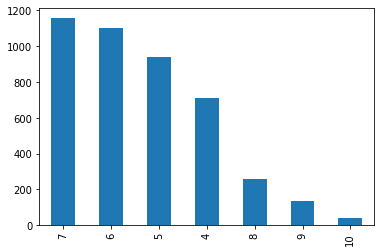

In [130]:
depositos["clasificacion_cliente"].value_counts().plot(kind="bar")

Se importa el data set modificado para su analisis posterior en Power BI.

In [131]:
depositos.to_excel("depositos_oinks_modificado.xlsx", index=False)